In [1]:
#importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the datasets

post_exp = pd.read_csv("t1_user_active_min.csv")
user_variant = pd.read_csv("t2_user_variant.csv")
pre_exp = pd.read_csv("t3_user_active_min_pre.csv")
user_char = pd.read_csv("t4_user_attributes.csv")

In [3]:
#checking if the import was done properly

print(post_exp.head())
print(user_variant.head())
print(pre_exp.head())
print(user_char.head())

   uid          dt  active_mins
0    0  2019-02-22          5.0
1    0  2019-03-11          5.0
2    0  2019-03-18          3.0
3    0  2019-03-22          4.0
4    0  2019-04-03          9.0
   uid  variant_number          dt signup_date
0    0               0  2019-02-06  2018-09-24
1    1               0  2019-02-06  2016-11-07
2    2               0  2019-02-06  2018-09-17
3    3               0  2019-02-06  2018-03-04
4    4               0  2019-02-06  2017-03-09
   uid          dt  active_mins
0    0  2018-09-24          3.0
1    0  2018-11-08          4.0
2    0  2018-11-24          3.0
3    0  2018-11-28          6.0
4    0  2018-12-02          6.0
   uid gender   user_type
0    0   male  non_reader
1    1   male      reader
2    2   male  non_reader
3    3   male  non_reader
4    4   male  non_reader


In [4]:
# summary statistics

print(post_exp.describe())
print(pre_exp.describe())

                uid   active_mins
count  1.066402e+06  1.066402e+06
mean   2.422100e+04  3.616809e+01
std    1.417358e+04  1.270484e+03
min    0.000000e+00  1.000000e+00
25%    1.202000e+04  2.000000e+00
50%    2.394100e+04  5.000000e+00
75%    3.618100e+04  1.700000e+01
max    4.999900e+04  9.999900e+04
                uid   active_mins
count  1.190093e+06  1.190093e+06
mean   2.420589e+04  3.220315e+01
std    1.417999e+04  1.181531e+03
min    0.000000e+00  1.000000e+00
25%    1.197500e+04  2.000000e+00
50%    2.393200e+04  4.000000e+00
75%    3.619600e+04  1.400000e+01
max    4.999900e+04  9.999900e+04


##### Here, we can see that the active mins per day are exceeding 1440 mins, which is not possible considering the fact that a day can have a maximum value of 1440 mins. Hence, we remove the data points exceeding this value. We do this since we do not have a reason behind these strange values in the data. If we did, we could have dealt with them in another way.

In [5]:
#removing outliers
post_exp = post_exp[post_exp["active_mins"]<=1440]
pre_exp = pre_exp[pre_exp["active_mins"]<=1440]

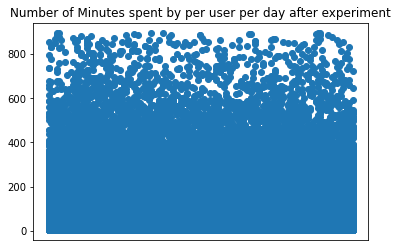

In [6]:
#scatter plots
plt.title("Number of Minutes spent by per user per day after experiment")
plt.scatter(post_exp["dt"],post_exp["active_mins"])
scatter1 = plt.gca()
scatter1.axes.get_xaxis().set_visible(False)

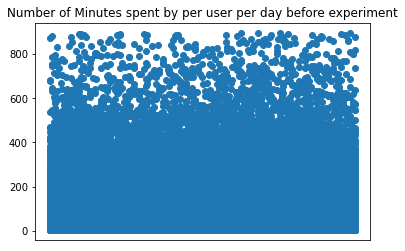

In [7]:
plt.title("Number of Minutes spent by per user per day before experiment")
plt.scatter(pre_exp["dt"],pre_exp["active_mins"])
scatter2 = plt.gca()
scatter2.axes.get_xaxis().set_visible(False)

##### Thus, the scatter plot seems right now after removal of the outlier values

In [8]:
#checking the distribution of control and treatment group
user_variant['variant_number'].value_counts()

0    40000
1    10000
Name: variant_number, dtype: int64

### Question 2

##### Separating control and experimental data

In [9]:
control = user_variant[user_variant['variant_number']==0]
control.head()

,uid,variant_number,dt,signup_date
0,0,0,2019-02-06,2018-09-24
1,1,0,2019-02-06,2016-11-07
2,2,0,2019-02-06,2018-09-17
3,3,0,2019-02-06,2018-03-04
4,4,0,2019-02-06,2017-03-09


In [10]:
exper = user_variant[user_variant['variant_number']==1]
exper.head()

,uid,variant_number,dt,signup_date
40000,40000,1,2019-02-06,2019-02-04
40001,40001,1,2019-02-06,2017-04-29
40002,40002,1,2019-02-06,2015-08-22
40003,40003,1,2019-02-06,2018-08-01
40004,40004,1,2019-02-06,2015-04-12


#### Merging with post_exper data

In [11]:
post_control = pd.merge(control,post_exp,how="inner",left_on='uid',right_on='uid')
post_control.head()

,uid,variant_number,dt_x,signup_date,dt_y,active_mins
0,0,0,2019-02-06,2018-09-24,2019-02-22,5.0
1,0,0,2019-02-06,2018-09-24,2019-03-11,5.0
2,0,0,2019-02-06,2018-09-24,2019-03-18,3.0
3,0,0,2019-02-06,2018-09-24,2019-03-22,4.0
4,0,0,2019-02-06,2018-09-24,2019-04-03,9.0


In [12]:
post_control.active_mins.describe()

count    886815.000000
mean         19.337660
std          44.797631
min           1.000000
25%           2.000000
50%           5.000000
75%          16.000000
max         897.000000
Name: active_mins, dtype: float64

In [13]:
post_exper = pd.merge(exper,post_exp,how="inner",left_on='uid',right_on='uid')
post_exper.head()

,uid,variant_number,dt_x,signup_date,dt_y,active_mins
0,40000,1,2019-02-06,2019-02-04,2019-02-13,3.0
1,40000,1,2019-02-06,2019-02-04,2019-03-02,18.0
2,40000,1,2019-02-06,2019-02-04,2019-03-12,4.0
3,40001,1,2019-02-06,2017-04-29,2019-02-14,16.0
4,40001,1,2019-02-06,2017-04-29,2019-02-17,5.0


In [14]:
post_exper.active_mins.describe()

count    179415.000000
mean         23.526294
std          54.191356
min           1.000000
25%           3.000000
50%           7.000000
75%          19.000000
max         895.000000
Name: active_mins, dtype: float64

##### Since my unit of analysis considered was active minutes per user per day, I compute the average active minutes for the post experimental data

In [15]:
post_exper_per_userday = {}
for i in post_exper.uid.unique():
    post_exper_per_userday[i] = [i, np.mean(post_exper[post_exper.uid == i].active_mins)]
    
post_exper_avg = pd.DataFrame.from_dict(post_exper_per_userday, orient='index', columns=['uid','avg_mins'])
post_exper_avg

,uid,avg_mins
40000,40000,8.333333
40001,40001,9.343750
40002,40002,7.038462
40004,40004,6.222222
40005,40005,8.027778
...,...,...
49995,49995,5.277778
49996,49996,12.000000
49997,49997,7.150943
49998,49998,17.558824


In [16]:
post_cont_per_userday = {}
for i in post_control.uid.unique():
    post_cont_per_userday[i] = [i, np.mean(post_control[post_control.uid == i].active_mins)]
    
post_cont_avg = pd.DataFrame.from_dict(post_cont_per_userday, orient='index', columns=['uid','avg_mins'])
post_cont_avg

,uid,avg_mins
0,0,3.307692
1,1,160.052632
2,2,2.428571
3,3,3.208333
4,4,1.950000
...,...,...
39995,39995,9.666667
39996,39996,4.090909
39997,39997,2.333333
39998,39998,1.000000


In [17]:
# t-test between control and treatment group
t_statistic1, p_value1 = ttest_ind(post_cont_avg['avg_mins'], post_exper_avg['avg_mins'])
print("t-stat: ",t_statistic1)
print("pval: " ,p_value1)

t-stat:  -12.842239619511044
pval:  1.1016675820058385e-37


#### Since the p-value is very small, we can conclude that the two means are significantly different

In [18]:
#computation of confidence interval
import math
def confidence_interval_means(A, B, z=1.96):
    A_mean = A.mean()
    B_mean = B.mean()
    A_std = A.std()
    B_std = B.std()
    pool_std = math.sqrt(((A.count()-1)*(A.std()**2)+(B.count()-1)*(B.std()**2))/(A.count()+B.count()-2))
    temp = A_mean - B_mean
    temp2 = z*pool_std*math.sqrt(1/A.count() + 1/B.count())
    return [temp - temp2,temp + temp2]

In [19]:
confidence_interval_means(post_cont_avg['avg_mins'], post_exper_avg['avg_mins'],)

[-3.3165835585593193, -2.4382700138700812]

### Question 3

#### Merging control and treatment datasets with pre experiment data

In [20]:
pre_control = pd.merge(control,pre_exp,how="inner",left_on='uid',right_on='uid')
pre_control.head()

,uid,variant_number,dt_x,signup_date,dt_y,active_mins
0,0,0,2019-02-06,2018-09-24,2018-09-24,3.0
1,0,0,2019-02-06,2018-09-24,2018-11-08,4.0
2,0,0,2019-02-06,2018-09-24,2018-11-24,3.0
3,0,0,2019-02-06,2018-09-24,2018-11-28,6.0
4,0,0,2019-02-06,2018-09-24,2018-12-02,6.0


In [21]:
pre_exper = pd.merge(exper,pre_exp,how="inner",left_on='uid',right_on='uid')
pre_exper.head()

,uid,variant_number,dt_x,signup_date,dt_y,active_mins
0,40001,1,2019-02-06,2017-04-29,2018-08-12,1.0
1,40001,1,2019-02-06,2017-04-29,2018-08-21,1.0
2,40001,1,2019-02-06,2017-04-29,2018-09-21,5.0
3,40001,1,2019-02-06,2017-04-29,2018-09-23,3.0
4,40001,1,2019-02-06,2017-04-29,2018-10-03,1.0


In [22]:
pre_exper_per_userday = {}
for i in pre_exper.uid.unique():
    pre_exper_per_userday[i] = [i, np.mean(pre_exper[pre_exper.uid == i].active_mins)]
    
pre_exper_avg = pd.DataFrame.from_dict(pre_exper_per_userday, orient='index', columns=['uid','avg_mins'])
pre_exper_avg

,uid,avg_mins
40001,40001,5.208333
40002,40002,3.913043
40003,40003,6.000000
40004,40004,1.428571
40005,40005,10.813559
...,...,...
49995,49995,2.615385
49996,49996,6.750000
49997,49997,3.608696
49998,49998,5.166667


In [23]:
pre_cont_per_userday = {}
for i in pre_control.uid.unique():
    pre_cont_per_userday[i] = [i, np.mean(pre_control[pre_control.uid == i].active_mins)]
    
pre_cont_avg = pd.DataFrame.from_dict(pre_cont_per_userday, orient='index', columns=['uid','avg_mins'])
pre_cont_avg

,uid,avg_mins
0,0,3.333333
1,1,158.330579
2,2,3.700000
3,3,5.684211
4,4,2.357143
...,...,...
39995,39995,10.921875
39996,39996,4.500000
39997,39997,3.000000
39998,39998,4.000000


#### Finding common uid in pre and post datasets

In [24]:
cont_common = pd.merge(pre_cont_avg,post_cont_avg,how="inner",left_on='uid',right_on='uid')
cont_common = cont_common.drop('avg_mins_x',axis=1)
cont_common = cont_common.drop('avg_mins_y',axis=1)

In [25]:
pre_cont=pd.merge(pre_cont_avg,cont_common,how="inner",left_on='uid',right_on='uid')
post_cont=pd.merge(post_cont_avg,cont_common,how="inner",left_on='uid',right_on='uid')

In [26]:
pre_cont

,uid,avg_mins
0,0,3.333333
1,1,158.330579
2,2,3.700000
3,3,5.684211
4,4,2.357143
...,...,...
37308,39995,10.921875
37309,39996,4.500000
37310,39997,3.000000
37311,39998,4.000000


In [27]:
exp_common = pd.merge(pre_exper_avg,post_exper_avg,how="inner",left_on='uid',right_on='uid')
exp_common = exp_common.drop('avg_mins_x',axis=1)
exp_common = exp_common.drop('avg_mins_y',axis=1)

In [28]:
pre_experiment=pd.merge(pre_exper_avg,exp_common,how="inner",left_on='uid',right_on='uid')
post_experiment=pd.merge(post_exper_avg,exp_common,how="inner",left_on='uid',right_on='uid')

#### I used paired t-tests to compare pre and post experiment data between control and treatment groups

In [29]:
# Paired sample t-test:
ttest_rel(pre_cont['avg_mins'], post_cont['avg_mins'])

Ttest_relResult(statistic=6.774595211398174, pvalue=1.2660383596977821e-11)

In [30]:
ttest_rel(pre_experiment['avg_mins'], post_experiment['avg_mins'])

Ttest_relResult(statistic=-32.47651351716391, pvalue=4.284671039308097e-219)

In [31]:
#confidence interval for experimental group
confidence_interval_means(pre_experiment['avg_mins'], post_experiment['avg_mins'],)

[-4.9512025849467145, -3.9442363191101935]

### Question 4

In [32]:
user_char.head(5)

,uid,gender,user_type
0,0,male,non_reader
1,1,male,reader
2,2,male,non_reader
3,3,male,non_reader
4,4,male,non_reader


In [33]:
user_char['gender'].value_counts()

male       27757
female     14477
unknown     7766
Name: gender, dtype: int64

In [34]:
user_char['user_type'].value_counts()

non_reader     36066
reader          8002
new_user        4888
contributor     1044
Name: user_type, dtype: int64

In [35]:
control1 = pd.merge(pre_cont,post_cont,how="inner",left_on='uid',right_on='uid')

In [36]:
control1

,uid,avg_mins_x,avg_mins_y
0,0,3.333333,3.307692
1,1,158.330579,160.052632
2,2,3.700000,2.428571
3,3,5.684211,3.208333
4,4,2.357143,1.950000
...,...,...,...
37308,39995,10.921875,9.666667
37309,39996,4.500000,4.090909
37310,39997,3.000000,2.333333
37311,39998,4.000000,1.000000


In [37]:
exper1=pd.merge(pre_experiment,post_experiment,how="inner",left_on='uid',right_on='uid')
exper1

,uid,avg_mins_x,avg_mins_y
0,40001,5.208333,9.343750
1,40002,3.913043,7.038462
2,40004,1.428571,6.222222
3,40005,10.813559,8.027778
4,40006,3.764706,5.388889
...,...,...,...
9160,49995,2.615385,5.277778
9161,49996,6.750000,12.000000
9162,49997,3.608696,7.150943
9163,49998,5.166667,17.558824


In [38]:
full = control1.append(exper1)

In [39]:
full.rename(columns={'avg_mins_x':'pre_avg_mins','avg_mins_y':'post_avg_mins'},inplace=True)
full

,uid,pre_avg_mins,post_avg_mins
0,0,3.333333,3.307692
1,1,158.330579,160.052632
2,2,3.700000,2.428571
3,3,5.684211,3.208333
4,4,2.357143,1.950000
...,...,...,...
9160,49995,2.615385,5.277778
9161,49996,6.750000,12.000000
9162,49997,3.608696,7.150943
9163,49998,5.166667,17.558824


In [40]:
exper1.rename(columns={'avg_mins_x':'pre_avg_mins','avg_mins_y':'post_avg_mins'},inplace=True)
exper1

,uid,pre_avg_mins,post_avg_mins
0,40001,5.208333,9.343750
1,40002,3.913043,7.038462
2,40004,1.428571,6.222222
3,40005,10.813559,8.027778
4,40006,3.764706,5.388889
...,...,...,...
9160,49995,2.615385,5.277778
9161,49996,6.750000,12.000000
9162,49997,3.608696,7.150943
9163,49998,5.166667,17.558824


In [41]:
full_exper = pd.merge(exper1,user_char,how="inner",left_on='uid',right_on='uid')
full_exper

,uid,pre_avg_mins,post_avg_mins,gender,user_type
0,40001,5.208333,9.343750,male,non_reader
1,40002,3.913043,7.038462,male,non_reader
2,40004,1.428571,6.222222,female,non_reader
3,40005,10.813559,8.027778,female,non_reader
4,40006,3.764706,5.388889,female,non_reader
...,...,...,...,...,...
9160,49995,2.615385,5.277778,unknown,non_reader
9161,49996,6.750000,12.000000,male,non_reader
9162,49997,3.608696,7.150943,female,reader
9163,49998,5.166667,17.558824,male,non_reader


In [42]:
full1 = pd.merge(full,user_char,how="inner",left_on='uid',right_on='uid')
full1

,uid,pre_avg_mins,post_avg_mins,gender,user_type
0,0,3.333333,3.307692,male,non_reader
1,1,158.330579,160.052632,male,reader
2,2,3.700000,2.428571,male,non_reader
3,3,5.684211,3.208333,male,non_reader
4,4,2.357143,1.950000,male,non_reader
...,...,...,...,...,...
46473,49995,2.615385,5.277778,unknown,non_reader
46474,49996,6.750000,12.000000,male,non_reader
46475,49997,3.608696,7.150943,female,reader
46476,49998,5.166667,17.558824,male,non_reader


#### Checking distribution of control versus treatment across gender

In [43]:
t1 = pd.merge(user_variant,user_char,on="uid",how="inner")
t1.groupby(['variant_number','gender'],as_index=False).agg({'uid':'count'})

,variant_number,gender,uid
0,0,female,11607
1,0,male,22237
2,0,unknown,6156
3,1,female,2870
4,1,male,5520
5,1,unknown,1610


#### Checking distribution of control versus treatment across user type

In [44]:
t2 = pd.merge(user_variant,user_char,on="uid",how="inner")
t2.groupby(['variant_number','user_type'],as_index=False).agg({'uid':'count'})

,variant_number,user_type,uid
0,0,contributor,915
1,0,new_user,3653
2,0,non_reader,28699
3,0,reader,6733
4,1,contributor,129
5,1,new_user,1235
6,1,non_reader,7367
7,1,reader,1269


#### Checking the avg mins spent by gender pre and post experiment

In [45]:
full_exper.groupby(['gender'],as_index=False).pre_avg_mins.agg({'before_exp':'mean'})

,gender,before_exp
0,female,6.584398
1,male,7.553167
2,unknown,7.185305


In [46]:
full_exper.groupby(['gender'],as_index=False).post_avg_mins.agg({'after_exp':'mean'})

,gender,after_exp
0,female,10.590656
1,male,12.397131
2,unknown,11.021509


#### There seems to be an increase in user engagement across all gender types post the treatment

#### Checking the avg mins spent by user type pre and post experiment

In [47]:
full_exper.groupby(['user_type'],as_index=False).pre_avg_mins.agg({'before_exp':'mean'})

,user_type,before_exp
0,contributor,44.492685
1,new_user,4.698840
2,non_reader,4.610943
3,reader,19.522641


In [48]:
full_exper.groupby(['user_type'],as_index=False).post_avg_mins.agg({'after_exp':'mean'})

,user_type,after_exp
0,contributor,65.306837
1,new_user,6.242814
2,non_reader,7.508955
3,reader,32.714566


#### The user engagement went up for different user types- especially for the contributors and reader whose average time spent has significatly increased. The treatment was a success!

In [49]:
#function to make dist plots

def dis_plot(dataframe1,dataframe2,column1,column2,xaxistitle,data_label1,data_label2):
    sns.distplot(dataframe1[column1], hist=False, label = data_label1, axlabel = xaxistitle)
    sns.distplot(dataframe2[column2], hist=False, label = data_label2, axlabel = xaxistitle)
    plt.legend()
    plt.show()

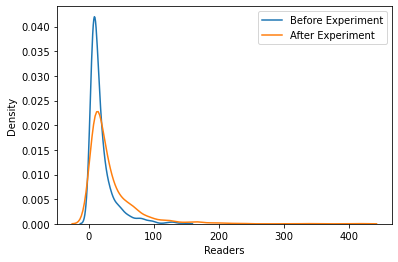

In [50]:
dis_plot(full_exper[full_exper['user_type']=="reader"],
           full_exper[full_exper['user_type']=="reader"],
          "pre_avg_mins","post_avg_mins","Readers", "Before Experiment","After Experiment")

#control = full_exper[full_exper['user_type']=="reader"]
#control.head()

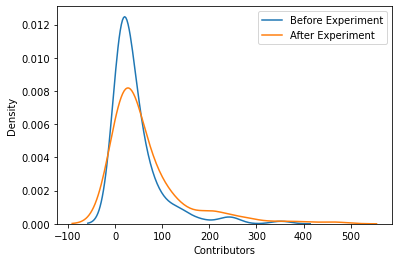

In [51]:
dis_plot(full_exper[full_exper['user_type']=="contributor"],
           full_exper[full_exper['user_type']=="contributor"],
          "pre_avg_mins","post_avg_mins","Contributors", "Before Experiment","After Experiment")

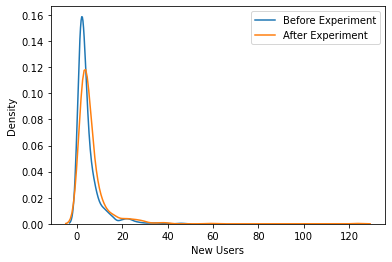

In [52]:
dis_plot(full_exper[full_exper['user_type']=="new_user"],
           full_exper[full_exper['user_type']=="new_user"],
          "pre_avg_mins","post_avg_mins","New Users", "Before Experiment","After Experiment")

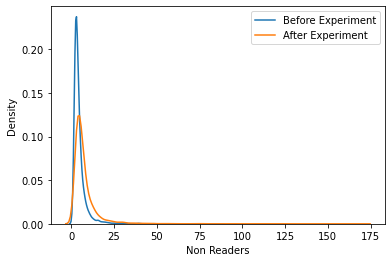

In [53]:
dis_plot(full_exper[full_exper['user_type']=="non_reader"],
           full_exper[full_exper['user_type']=="non_reader"],
          "pre_avg_mins","post_avg_mins","Non Readers", "Before Experiment","After Experiment")

###############################################################################################################################